In [1]:
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from skimage import data
from skimage import io

ModuleNotFoundError: No module named 'skimage'

# Playing with colors


In [3]:
from skimage import color

Let's load some sample images.

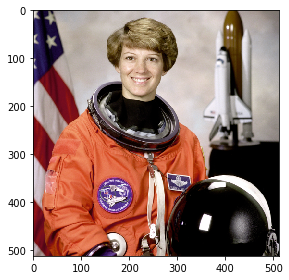

In [35]:
astronaut = data.astronaut()
io.imshow(astronaut)
io.show()

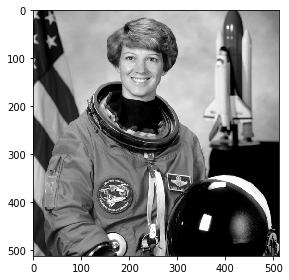

In [5]:
astronaut_gray = color.rgb2gray(astronaut)
io.imshow(astronaut_gray)

# Gradients

In [6]:
import numpy as np
from skimage.filters.rank import gradient

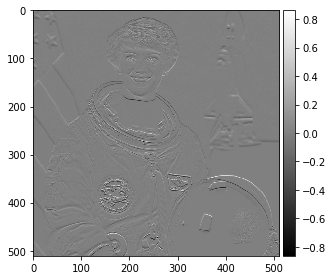

In [7]:
grad_y = np.diff(astronaut_gray, axis=0)
io.imshow(grad_y, cmap='gray')

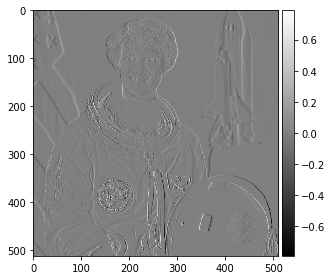

In [8]:
grad_x = np.diff(astronaut_gray, axis=1)
io.imshow(grad_x, cmap='gray')

**Note: across the dimention of the gradient the size of the gradient image is the size of original - 1**

# [Filters](http://scikit-image.org/docs/0.10.x/api/skimage.filter.html)

In [9]:
from skimage import filters

## Gaussian

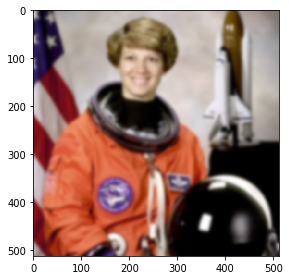

In [39]:
filtered = filters.gaussian(astronaut, sigma=3, multichannel=True)
io.imshow(filtered)

We can specify different sigma for x and y:

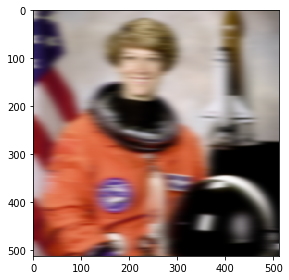

In [17]:
filtered = filters.gaussian(astronaut, sigma=[1, 10], multichannel=True)
io.imshow(filtered)

In [17]:
filtered.shape == astronaut.shape

True

## Sobel

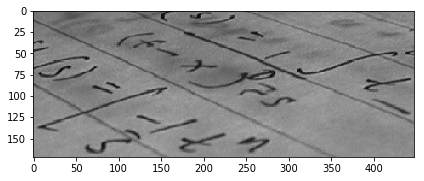

In [19]:
text = data.text()
io.imshow(text)

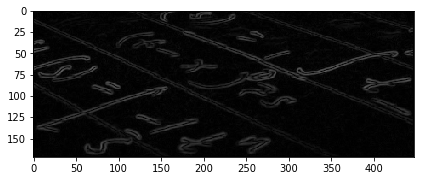

In [20]:
edges = filters.sobel(text)
io.imshow(edges)

## Canny


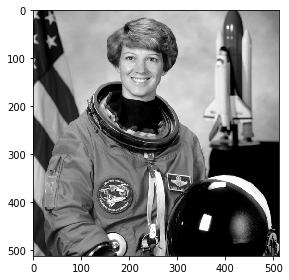

In [21]:
io.imshow(astronaut_gray)

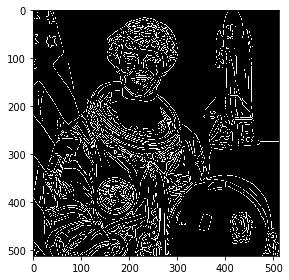

In [22]:
from skimage import feature

edges = feature.canny(astronaut_gray)
io.imshow(edges)

Let's set some parameters for the blur and thresholding.

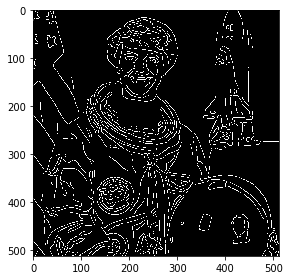

In [23]:
edges = feature.canny(astronaut_gray, sigma=2)
io.imshow(edges)

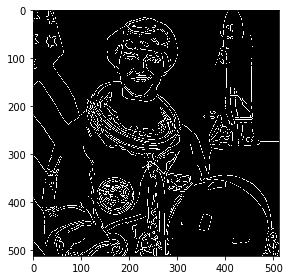

In [24]:
edges = feature.canny(astronaut_gray, sigma=1, low_threshold=0.2, high_threshold=0.5)
io.imshow(edges)

# [Features](http://scikit-image.org/docs/0.10.x/api/skimage.feature.html)


In [26]:
from skimage.feature import corner_harris, peak_local_max, corner_peaks

## Harris corner detector

Compute the corner measure based on the autocorrelation matrix.

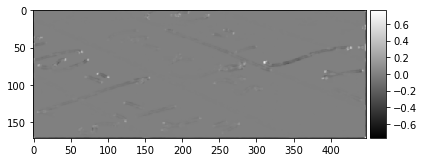

In [27]:
image = color.rgb2gray(data.text())
corners = corner_harris(image)
io.imshow(corners, cmap='gray')

Now let's pick the actual corners: here we simply find the miximum peaks.

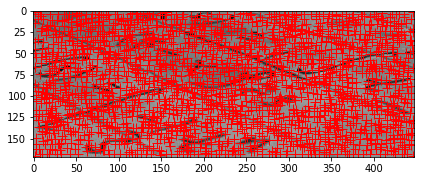

In [30]:
coords = peak_local_max(corners)
io.imshow(image, cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=10)
plt.show()

Set blur intensity and distance between the peaks.

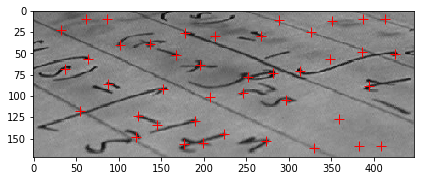

In [31]:
coords = peak_local_max(corner_harris(image, sigma=5), min_distance=10)
io.imshow(image, cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=10)
plt.show()

A fancier corner selection technique: suppresses multiple connected peaks with `corner_peaks`.

# Template matching

In [32]:
from skimage.feature import match_template

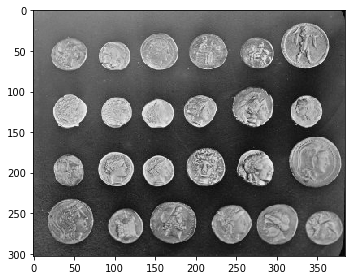

In [34]:
image = data.coins()
io.imshow(image)

Let's pick a coin to localize: the one in row 3, column 2.

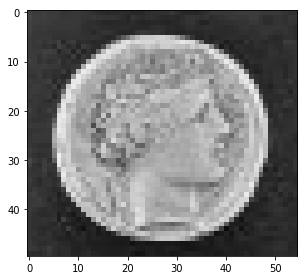

In [36]:
coin = image[170:220, 75:130]
io.imshow(coin)

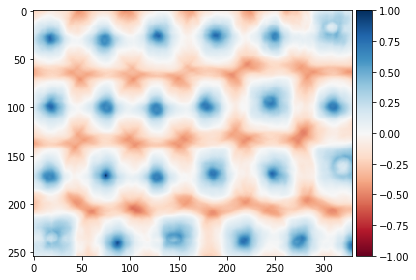

In [37]:
match = match_template(image, coin)
io.imshow(match)

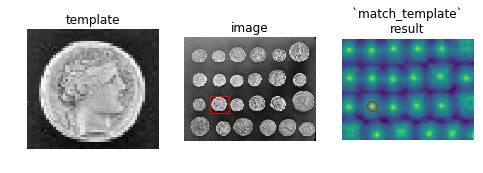

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(coin, cmap='gray')
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap='gray')
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()